# Pattern Recognition and Machine Learning
## 1.1 Example: Polynomial Curve Fitting

**Modifier:** César Arroyo Cárdenas.<br>
Based on the original notebook in: https://github.com/tkazusa/Python_MachineLeaning/blob/master/1.1%20Polynomial%20Curve%20Fitting.ipynb.

### Objective
The aim of this notebook is to follow the discussion in section 1.1 from the book **Pattern Recognition and Machine Learning** by *Christopher Bishop*. First I give an ultra-fast introduction to `python`, `numpy` and `matplotlib`.

### Ultra-fast introduction to Python and Jupyter notebooks

In [7]:
## Here is how to call libraries.
import numpy as np ## The n-dimensional array numeric library.
from matplotlib import pyplot as plt ## Plotting library.
import sys ## Library to interact with the system. Not important by now.

## Print the versions of Python and used libraries.
print('Python version: {}'.format(sys.version))
print('Numpy version: {}'.format(np.__version__))

Python version: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Numpy version: 1.16.4


In `python`, lists are one of the basic data structures. They can contain any type of data.

In [8]:
## Define a list.
a = [1.2, 2, 'abc']

## Extract value from a list.
print(a[1])

2


In `numpy` there is the `ndarray`. The name comes from n-dimensional array. For our purposes we only need to deal with matrices and vectors. `ndarray`s can be constructed from lists but all objects inside the list must be of the same type or at least convertible to the same type.

The fundamental advantage of the `ndarray` is that quick vector and matrices operations are implemented. Every operation is executed element-wise or following some rules described in the documentation. Below there are some examples in the use of the `ndarray`.

In [15]:
a = np.array([1., 2., 3., 4., 5.])
b = np.array([i for i in np.arange(0., 10., 2.)])

## Check the values of the arrays.
print('Checking arrays')
print(a, b, '\n')

## Some operations. Note they are element-wise.
print('Operations on arrays')
print(a + b)
print(a * b)
print(b / a)
print()

## Some numpy functions on arrays.
print('Numpy functions on arrays')
print('Sum of all elements of a: {}'.format(np.sum(a)))
print('Average of all elements in a: {}'.format(np.mean(a)))

Checking arrays
[1. 2. 3. 4. 5.] [0. 2. 4. 6. 8.] 

Operations on arrays
[ 1.  4.  7. 10. 13.]
[ 0.  4. 12. 24. 40.]
[0.         1.         1.33333333 1.5        1.6       ]

Numpy functions on arrays
Sum of all elements of a: 15.0
Average of all elements in a: 3.0


The module `pyplot` contains utilities to make quick and easy plots using `ndarray`s. We not plot the elements of `a` against the elements of `b`.

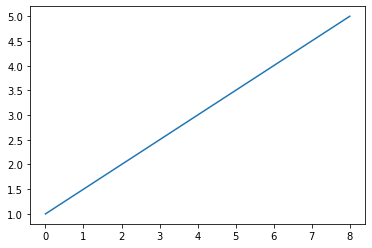

In [17]:
plt.figure() ## Creates figure instance.
plt.plot(b, a) ## Gives the order to plot inside the figure.
plt.show() ## Show the figure.

### Training data

Plot a traning data set of $N$ = 10 points, shown as blue circles, each comparising an observation of the input variable $x$  along with the corresponding target variable $t$. The green curve shows the funcsion $sin(2\pi x)$ used to generate the data.


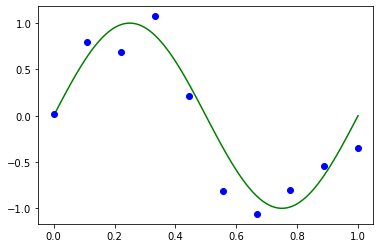

In [46]:
## Set the random seed.
np.random.seed(4)

## Uniformly distributed numbers in [0, 1]. Input dataset.
x = np.linspace(0., 1., num = 10)

## Target dataset. Function sin(2\pi x) plus random noise.
t = np.sin(2.*np.pi*x) + np.random.normal(0., 0.3, 10)

## To plot the true function.
x_true = np.linspace(0., 1., num = 100)
t_true = np.sin(2.*np.pi*x_true) ## Values for the true function.


plt.figure()
plt.plot(x_true, t_true, 'g')
plt.plot(x, t, 'bo')
plt.show()

### Procedure

① Implement the formula (1.1)
\begin{equation*}
 y(x, {\bf w}) = w_0 + w_1 x + w_1 x^2 + ...+ w_M x^M = \sum_{j=1}^M w_j x^M (1.1)
\end{equation*}
where  $M$ is oder of polynominal. 

②To obtain parameter $w$, sum of the sequares of the errors between predictions and each data points $x_n$. 

\begin{equation*}
E({\bf w}) = \frac{1}{2}  \sum_{n=1}^N \{{y({x_n, \bf w}) -t_n} \}^2 \quad(1.2)
\end{equation*} 

③Simultaneous equations ((1.122) and (1.123)) is solved to minimize (1.2).

\begin{equation*}
\sum_{j=0}^M {A}_{ij} w_j = {T}_i \quad(1.122)
\end{equation*}

\begin{equation*}
{A}_{ij} = \sum_{n=1}^N (x_n)^{i+j} \quad(1.123)
\end{equation*}

\begin{equation*}
{T}_i = \sum_{n=1}^N (x_n)^i t_n \quad(1.123)
\end{equation*}

###Code

In [28]:
import numpy as np
import pandas as pd
#from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
## (1.1) Definition of the linear model
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

##y = np.vectorize(y, excluded = ['W', 'M'])

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()
        
    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

# (1.2) Loss function
def rms_error(x, W, t):
    M = len(W) - 1
    y_values = y(x, W, M)
    
    loss_val = np.sum(np.square(y_values - t))
    rms = np.sqrt(loss_val/len(x))
    
    return(rms)

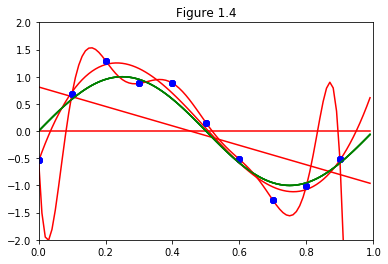

In [67]:
if __name__ == "__main__":
    
    np.random.seed(100)
    #Sine curve
    x_real = np.arange(0, 1, 0.01)
    y_real = np.sin(2*np.pi*x_real)
    
    ##Training Data
    N=10
    x_train = np.arange(0, 1, 0.1)
    
    #Set "small level of random noise having a Gaussian distribution"
    loc = 0
    scale = 0.3
    y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)
    
    W_list = []
    rms_train  = []
    
    for M in range(10):
        W = E(x_train, y_train, M)
        W_list.append(W)
    
        y_estimate = [y(x, W, M) for x in x_real]
        y_estimate_loss = [y(x, W, M) for x in x_train]
        
        loss_val = np.sum(np.square(y_estimate_loss - y_train))
        rms = np.sqrt(loss_val/N)
        rms_train.append(rms)

        if(M in [0, 1, 3, 9]):
            plt.plot(x_real, y_estimate, 'r-')
            plt.plot(x_train, y_train, 'bo') 
            plt.plot(x_real, y_real, 'g-')
            plt.xlim(0.0, 1.0)
            plt.ylim(-2, 2)
            plt.title("Figure 1.4")

In [74]:
## Generate new data.
## Test Data
N = 100
x_test = np.arange(0, 1, 0.01)
y_test =  np.sin(2*np.pi*x_test) + np.random.normal(loc,scale,N)

rms_test = []    

for M in range(10):
    W = W_list[M]
    y_estimate_loss = [y(x, W, M) for x in x_test]
    
    loss_val = np.sum(np.square(y_estimate_loss - y_test))
    rms = np.sqrt(loss_val/N)
    rms_test.append(rms)

In [75]:
print(len(rms_test))

10


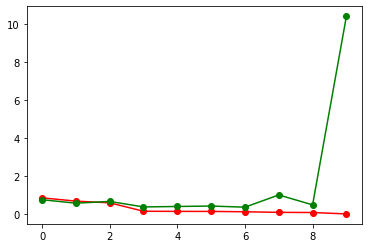

In [76]:
plt.figure()
M_array = list(range(10))
plt.plot(M_array, rms_train, '-o', color='red')
plt.plot(np.arange(0, 10), rms_test, '-o', color='green')
plt.show()

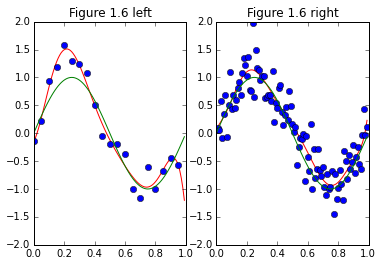

In [4]:
if __name__ == "__main__":
    M2 = 9

    N2 = 20
    x_train2 = np.arange(0, 1, 0.05)
    y_train2 =  np.sin(2*np.pi*x_train2) + np.random.normal(loc,scale,N2)

    N3 = 100
    x_train3 = np.arange(0,1, 0.01)
    y_train3 =  np.sin(2*np.pi*x_train3) + np.random.normal(loc,scale,N3)


    W2 = E(x_train2, y_train2, M2)
    W3 = E(x_train3, y_train3, M2)
    
    y_estimate2 = [y(x, W2, M2) for x in x_real]
    y_estimate3 = [y(x, W3, M2) for x in x_real]

    plt.subplot(1, 2, 1)
    plt.plot(x_real, y_estimate2, 'r-')
    plt.plot(x_train2, y_train2, 'bo') 
    plt.plot(x_real, y_real, 'g-')
    xlim(0.0, 1.0)
    ylim(-2, 2)
    title("Figure 1.6 left")

    plt.subplot(1, 2, 2)
    plt.plot(x_real, y_estimate3, 'r-')
    plt.plot(x_train3, y_train3, 'bo') 
    plt.plot(x_real, y_real, 'g-')
    xlim(0.0, 1.0)
    ylim(-2, 2)
    title("Figure 1.6 right")

###References

Christopher Bishop. (2007). Pattern Recognition and Machine Learning (Information Science and Statistics). Springer